In [105]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [107]:
url = "http://api.openweathermap.org/data/2.5/weather?unit=Imperial&APPID=" + weather_api_key
time.sleep(0.01)

In [108]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [109]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [110]:
for coordinate in coordinates:
    print (coordinate[0], coordinate[1])

-47.64662059123107 -20.930280825526296
29.18946895757827 -72.03190107486515
2.5954024171632852 135.7872554990982
88.97563531483709 49.69439976410831
-82.10746416452922 -60.64653577912597
51.087272434848046 -53.19853022157915
36.391571319403255 38.92726234939212
66.64226406257265 109.02995180701953
-44.09708620400589 128.25925998549116
-66.20708180763489 66.62773212492499
21.607360425702154 -4.756974008097529
76.61219483200856 -21.345849036298404
31.08667759022532 -32.963503982800574
37.71569664990869 176.44584705903907
-86.07679831853798 -6.074929369663408
-71.73236264254156 -57.08677483086299
77.75941218977968 107.91865234948074
64.59125104668419 20.029607930915773
30.850889121397117 -28.337241850673763
49.129794617939666 -55.14873776498551
-57.34972140675274 -46.25034872885175
43.484735479098276 27.74617758811692
70.01902633924647 86.3444641733443
67.5850116308126 -178.62741443368026
-43.77519829108452 -135.41409859310775
73.04170470300195 178.55362050737574
44.6395249761342 93.35982

-47.28838784487132 -149.28755883613272
55.08771217054738 64.59055150012156
34.76148473506029 -125.78821556595636
60.13377772678243 31.95850237086509
-36.919773369014585 -112.47176340606373
0.4940714887678581 -134.60295502416017
-39.26744584410073 28.316264576150786
58.77872544040861 -171.70939682643998
-69.14471659316516 -42.96740063877823
-55.410808300883616 32.0177013398052
58.47822336131097 87.78739072627542
29.449329480101937 -66.68305399470275
66.52924659520542 69.82365231300719
-54.681835431517676 118.169479309638
13.041942627159173 -103.9527870523813
-30.508337123366125 -19.548201297794208
49.780408480990786 -35.8457114863339
-84.05510618229847 -100.75019218870791
-89.5041311279091 170.30473663527152
42.9987433100182 88.33009745064743
-29.130513012139076 118.79505082944246
64.65084021014044 103.14457144668876
-68.80492060480731 9.18925339191017
39.70398337388917 76.15738665220965
-54.49289919336782 -54.509524372670555
64.71244067979256 -121.35734314478077
36.517283756850134 150.

-70.35178406011235 -51.5718077888277
-79.62407239583767 -8.25377704555865
9.297444809658359 -167.3258375930746
-36.123839923832385 -41.81673787934474
60.585822214031 -139.24799334829643
30.927154148332306 77.28783668751004
44.661455432677684 86.33735702397706
87.62325143143113 178.2802109062833
51.16538359551902 7.662159309211404
-81.00449689304257 -101.43059903892309
-85.83227177332334 -33.94014738053437
15.385408577004114 121.68168625332066
71.55131375148059 -94.76594326289036
19.419325179055946 7.645636001429494
-37.880499811378144 -116.71560473814675
16.063089886324974 -109.5960372244805
-25.028299061987084 22.27510092999964
74.35494318888692 -120.23488950008733
-34.599760677034965 -46.89088089165378
69.95880891623571 23.102941526087278
-70.22429552477733 28.28732071315133
38.647185442820046 -78.82673694396603
2.37547673032968 -98.30930830358047
-82.81990358474225 -118.19667504452411
83.61491059129523 -48.82277285054033
18.678619819105364 -146.38009088095077
70.81563752882855 -152.

-39.35622700030091 103.65632454000144
17.147724076062957 113.07531001173902
-84.15559854367758 9.391545745299567
59.37978624739466 -164.58108854638024
23.063112531164904 -121.1043375534799
28.11024064969213 -72.92119951219406
-53.54461918102595 12.965459319045408
-29.414653232955658 26.746653819284347
-50.44679853006288 -173.8957483049139
57.23860279759393 26.451873409923735
-73.06438194069892 -48.50228417855709
-3.674499549307285 60.93758024884147
75.09153876750045 -152.65682823898518
-5.138684044336841 3.251765089349192
44.73922180709036 -128.82830628467883
-77.99067901186237 -48.93413479986327
20.785031650397244 -51.01945410116258
-20.402051010462955 -108.01860890543297
76.32299580913173 -60.30484623930053
80.8137995752868 164.24887920647961
-14.545281899046003 -36.5511419524083
-25.316632870056367 4.259630635349623
19.991056127144702 59.47646567759227
1.9986571721408666 87.63429047774866
-9.849930022890348 -42.637577907468454
-46.473651660234054 -170.93387896499675
-52.420565045785

In [111]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [112]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [113]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]). city_name
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

879

In [114]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | marsh harbour
Processing Record 3 of Set 1 | biak
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hare bay
Processing Record 7 of Set 1 | suruc
Processing Record 8 of Set 1 | aykhal
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | taoudenni
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | umea
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | lewisporte
Processing Record 20 of Set 1 | dobric
Processing Record 

Processing Record 35 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 36 of Set 4 | vardo
Processing Record 37 of Set 4 | ust-nera
Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | cache creek
Processing Record 40 of Set 4 | asasa
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | bengbu
Processing Record 43 of Set 4 | boueni
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | tazovskiy
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | obligado
Processing Record 49 of Set 4 | kuznechnoye
Processing Record 50 of Set 4 | impfondo
Processing Record 1 of Set 5 | srednekolymsk
Processing Record 2 of Set 5 | quetta
Processing Record 3 of Set 5 | gorontalo
Processing Record 4 of Set 5 | grand gaube
Processing Record 5 of Set 5 | flin flon
Processing Record 6 of Set 5 | kokkola
Processing Record 7 of Set 5 | golden
Processing Record 8 of Set 5 | san

Processing Record 23 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 24 of Set 8 | tual
Processing Record 25 of Set 8 | dhidhdhoo
Processing Record 26 of Set 8 | asayita
City not found. Skipping...
Processing Record 27 of Set 8 | taybad
Processing Record 28 of Set 8 | yarmouth
Processing Record 29 of Set 8 | sao felix do xingu
Processing Record 30 of Set 8 | portland
Processing Record 31 of Set 8 | olafsvik
Processing Record 32 of Set 8 | teknaf
Processing Record 33 of Set 8 | polonnaruwa
Processing Record 34 of Set 8 | port keats
Processing Record 35 of Set 8 | yar-sale
Processing Record 36 of Set 8 | payyannur
Processing Record 37 of Set 8 | wad rawah
Processing Record 38 of Set 8 | phimai
Processing Record 39 of Set 8 | bolshaya atnya
City not found. Skipping...
Processing Record 40 of Set 8 | kurtamysh
Processing Record 41 of Set 8 | pacific grove
Processing Record 42 of Set 8 | novaya ladoga
Processing Record 43 of Set 8 | teguldet
Processing Record 44 of S

Processing Record 8 of Set 12 | bhaderwah
Processing Record 9 of Set 12 | alofi
Processing Record 10 of Set 12 | altus
Processing Record 11 of Set 12 | lumeje
Processing Record 12 of Set 12 | howard springs
Processing Record 13 of Set 12 | lima
Processing Record 14 of Set 12 | nizhniy tsasuchey
Processing Record 15 of Set 12 | soyo
Processing Record 16 of Set 12 | madang
Processing Record 17 of Set 12 | skibotn
Processing Record 18 of Set 12 | villa florida
Processing Record 19 of Set 12 | yangjiang
Processing Record 20 of Set 12 | saint-francois
Processing Record 21 of Set 12 | madhugiri
Processing Record 22 of Set 12 | daru
Processing Record 23 of Set 12 | hay river
Processing Record 24 of Set 12 | nsanje
Processing Record 25 of Set 12 | coahuayana
Processing Record 26 of Set 12 | otuzco
Processing Record 27 of Set 12 | fairbanks
Processing Record 28 of Set 12 | maralal
Processing Record 29 of Set 12 | matamoros
Processing Record 30 of Set 12 | sassandra
Processing Record 31 of Set 1

Processing Record 46 of Set 15 | volchikha
Processing Record 47 of Set 15 | umm jarr
City not found. Skipping...
Processing Record 48 of Set 15 | swellendam
Processing Record 49 of Set 15 | zhuji
Processing Record 50 of Set 15 | zilair
Processing Record 1 of Set 16 | narsaq
Processing Record 2 of Set 16 | kijang
Processing Record 3 of Set 16 | vitim
Processing Record 4 of Set 16 | hirado
Processing Record 5 of Set 16 | villa del rosario
Processing Record 6 of Set 16 | labuhan
Processing Record 7 of Set 16 | igrim
Processing Record 8 of Set 16 | tygda
Processing Record 9 of Set 16 | mergui
City not found. Skipping...
Processing Record 10 of Set 16 | rungata
City not found. Skipping...
Processing Record 11 of Set 16 | geneva
Processing Record 12 of Set 16 | gladstone
Processing Record 13 of Set 16 | rawson
Processing Record 14 of Set 16 | saint anthony
Processing Record 15 of Set 16 | opunake
Processing Record 16 of Set 16 | villa maria
Processing Record 17 of Set 16 | chapais
Processing

In [115]:
len(city_data)

805

In [116]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,297.15,94,90,6.69,BR,2021-02-06 19:10:24
1,Marsh Harbour,26.5412,-77.0636,298.11,76,0,8.05,BS,2021-02-06 19:10:24
2,Biak,-0.9131,122.8766,297.97,76,100,1.22,ID,2021-02-06 19:10:24
3,Ushuaia,-54.8000,-68.3000,286.15,67,20,9.77,AR,2021-02-06 19:09:24
4,Hare Bay,48.8499,-54.0148,273.15,93,90,8.75,CA,2021-02-06 19:10:24
5,Suruc,36.9761,38.4250,282.15,49,0,1.54,TR,2021-02-06 19:10:24
6,Aykhal,66.0000,111.5000,236.72,81,4,2.59,RU,2021-02-06 19:05:44
7,Esperance,-33.8667,121.9000,288.15,94,40,6.17,AU,2021-02-06 19:07:11
8,Taoudenni,22.6783,-3.9836,294.14,23,33,5.74,ML,2021-02-06 19:10:25
9,Ribeira Grande,38.5167,-28.7000,289.15,88,75,9.26,PT,2021-02-06 19:10:25


In [117]:
# rearrange the column
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2021-02-06 19:10:24,-22.9661,-42.0278,297.15,94,90,6.69
1,Marsh Harbour,BS,2021-02-06 19:10:24,26.5412,-77.0636,298.11,76,0,8.05
2,Biak,ID,2021-02-06 19:10:24,-0.9131,122.8766,297.97,76,100,1.22
3,Ushuaia,AR,2021-02-06 19:09:24,-54.8000,-68.3000,286.15,67,20,9.77
4,Hare Bay,CA,2021-02-06 19:10:24,48.8499,-54.0148,273.15,93,90,8.75
...,...,...,...,...,...,...,...,...,...
800,Terrace,CA,2021-02-06 19:08:32,54.5163,-128.6035,272.15,100,75,1.03
801,Cavalcante,BR,2021-02-06 19:11:53,-13.7975,-47.4583,294.07,94,100,1.80
802,Chau Doc,VN,2021-02-06 19:11:53,10.7000,105.1167,295.49,86,54,2.74
803,Thinadhoo,MV,2021-02-06 19:11:53,0.5333,72.9333,300.81,75,11,6.26


In [120]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [121]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

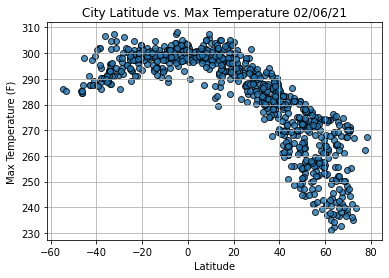

In [122]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

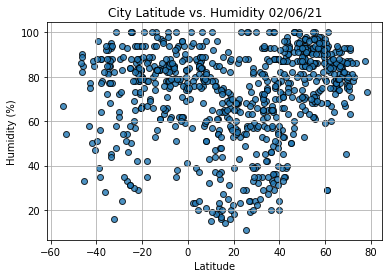

In [123]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

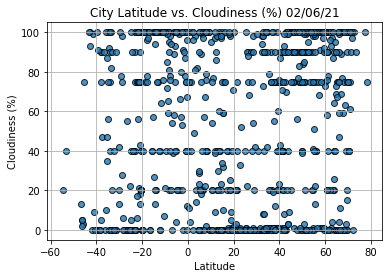

In [124]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

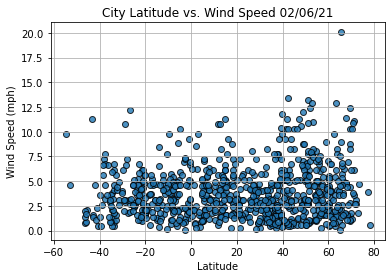

In [125]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [126]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [127]:
index0 = city_data_df.loc[0]
index0

City              Arraial Do Cabo
Country                        BR
Date          2021-02-06 19:10:24
Lat                      -22.9661
Lng                      -42.0278
Max Temp                   297.15
Humidity                       94
Cloudiness                     90
Wind Speed                   6.69
Name: 0, dtype: object

In [128]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Marsh Harbour,BS,2021-02-06 19:10:24,26.5412,-77.0636,298.11,76,0,8.05
4,Hare Bay,CA,2021-02-06 19:10:24,48.8499,-54.0148,273.15,93,90,8.75
5,Suruc,TR,2021-02-06 19:10:24,36.9761,38.4250,282.15,49,0,1.54
6,Aykhal,RU,2021-02-06 19:05:44,66.0000,111.5000,236.72,81,4,2.59
8,Taoudenni,ML,2021-02-06 19:10:25,22.6783,-3.9836,294.14,23,33,5.74
...,...,...,...,...,...,...,...,...,...
799,Tikaitnagar,IN,2021-02-06 19:11:53,26.9500,81.5833,285.10,58,0,3.47
800,Terrace,CA,2021-02-06 19:08:32,54.5163,-128.6035,272.15,100,75,1.03
802,Chau Doc,VN,2021-02-06 19:11:53,10.7000,105.1167,295.49,86,54,2.74
803,Thinadhoo,MV,2021-02-06 19:11:53,0.5333,72.9333,300.81,75,11,6.26


In [129]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Marsh Harbour,BS,2021-02-06 19:10:24,26.5412,-77.0636,298.11,76,0,8.05
4,Hare Bay,CA,2021-02-06 19:10:24,48.8499,-54.0148,273.15,93,90,8.75
5,Suruc,TR,2021-02-06 19:10:24,36.9761,38.4250,282.15,49,0,1.54
6,Aykhal,RU,2021-02-06 19:05:44,66.0000,111.5000,236.72,81,4,2.59
8,Taoudenni,ML,2021-02-06 19:10:25,22.6783,-3.9836,294.14,23,33,5.74


In [133]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

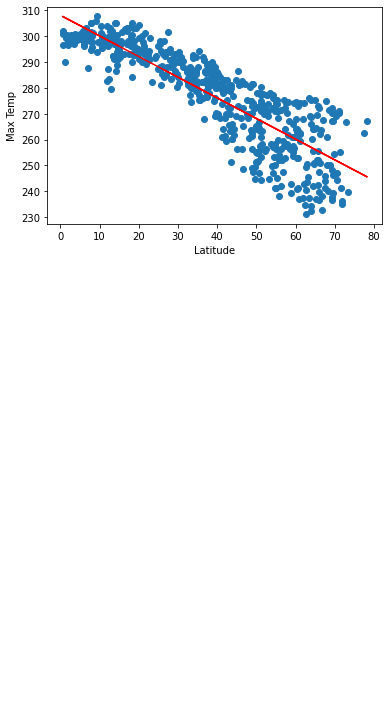

In [134]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


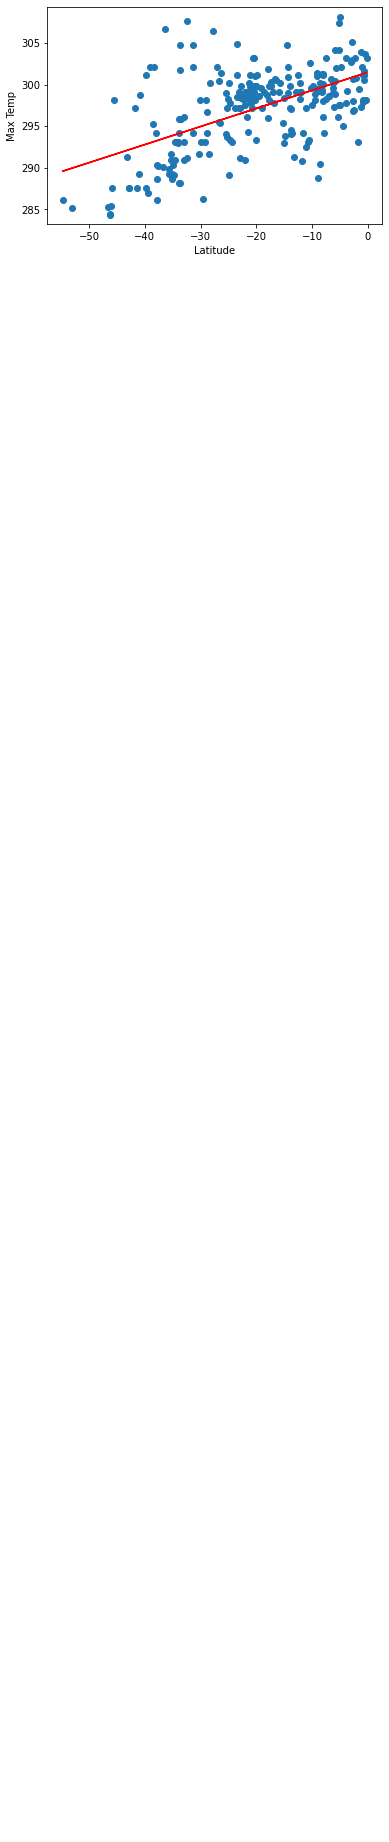

In [135]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

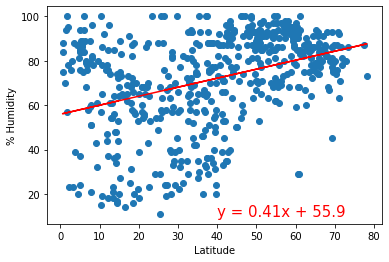

In [136]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

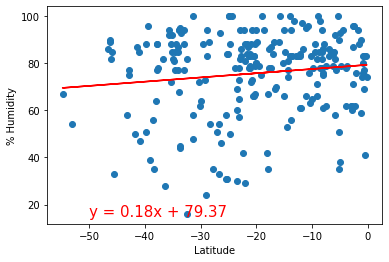

In [137]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

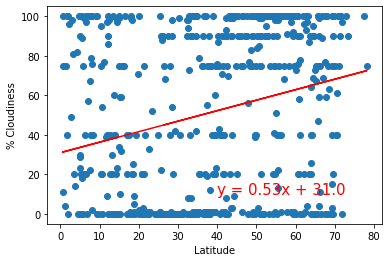

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

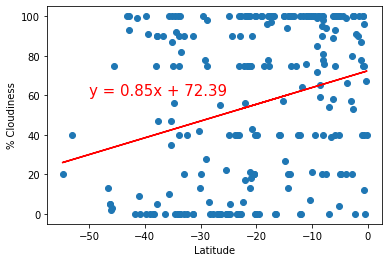

In [139]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [140]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
# print(f"The p-value is: {p_value:.3f}")
print(r_value)

0.2723782739497697


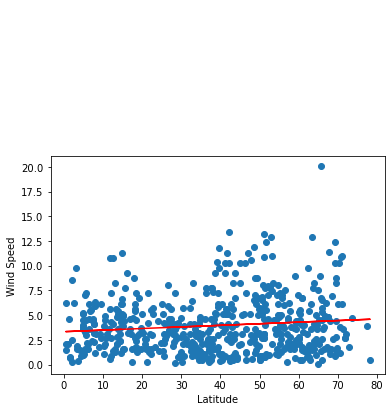

In [141]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

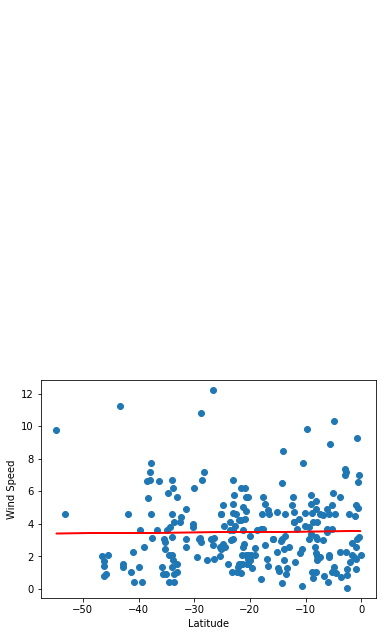

In [142]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))